In [1]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.3 MB/s eta 0:00:00:00:0100:01


In [ ]:
import kagglehub
default_path = kagglehub.dataset_download("iasadpanwhar/football-player-detection-yolov8")
default_path


'/kaggle/input/football-player-detection-yolov8'

In [7]:
path = "/kaggle/input/football-player-detection-yolov8/football_players_detection/football_players_detection"
path

'/kaggle/input/football-player-detection-yolov8/football_players_detection/football_players_detection'

In [11]:
import os

def count_images(img_folder, extensions=('.jpg', '.jpeg', '.png')):
    return len([f for f in os.listdir(img_folder) if f.lower().endswith(extensions)])

train_len = count_images(f"{path}/train/images")
val_len = count_images(f"{path}/valid/images")
test_len = count_images(f"{path}/test/images")

print(f"Train images: {train_len}")
print(f"Validation images: {val_len}")
print(f"test images: {test_len}")


Train images: 10308
Validation images: 972
test images: 520


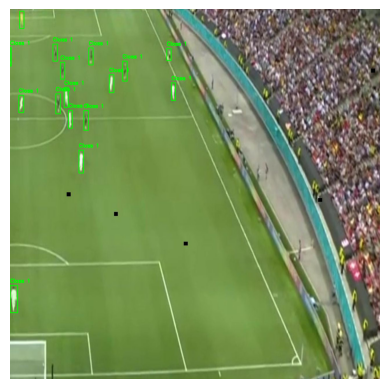

In [ ]:
import cv2
import matplotlib.pyplot as plt

def show_image_with_bboxes(img_path, label_path):
    # Read image
    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    # Read label file
    with open(label_path, 'r') as f:
        lines = f.readlines()

    # Draw boxes
    for line in lines:
        cls, x_c, y_c, bw, bh = line.strip().split()
        x_c, y_c, bw, bh = map(float, [x_c, y_c, bw, bh])

        # Convert YOLO bbox format to pixel coords
        x1 = int((x_c - bw/2) * w)
        y1 = int((y_c - bh/2) * h)
        x2 = int((x_c + bw/2) * w)
        y2 = int((y_c + bh/2) * h)

        # Draw rectangle (green box)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)

        # Put class label text
        cv2.putText(img, f"Class {cls}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Show image
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

# Example usage:
image_file = f"{path}/train/images/0_pp_jpg.rf.7d9197db792cf28671b6cbe24110044c.jpg"  # change to your image file
label_file = f"{path}/train/labels/0_pp_jpg.rf.7d9197db792cf28671b6cbe24110044c.txt"  # matching label file

show_image_with_bboxes(image_file, label_file)


In [13]:
!pip -q install clearml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.9 MB/s eta 0:00:00a 0:00:01


In [14]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("CLEARML_API_ACCESS_KEY")
secret_value_1 = user_secrets.get_secret("CLEARML_API_SECRET_KEY")

In [20]:
import os

os.environ["CLEARML_WEB_HOST"] = "https://app.clear.ml"
os.environ["CLEARML_API_HOST"] = "https://api.clear.ml"
os.environ["CLEARML_FILES_HOST"] = "https://files.clear.ml"
os.environ["CLEARML_API_ACCESS_KEY"] = secret_value_0
os.environ["CLEARML_API_SECRET_KEY"] = secret_value_1

In [ ]:
# for logging
import clearml

clearml.browser_login()

In [23]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

model.train(
    data=f"{path}/data.yaml",
    epochs=100,
    patience=20,
    batch=32,
    imgsz=640,
    device=-1,
    workers=os.cpu_count(),
    project="player-detection-yolov8",
    name="run",
    save=True,
    optimizer="adamw",
    cos_lr=True,
    classes=[1],
    seed=42,
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 167MB/s]


Searching for 1 idle GPUs with free memory >= 20.0% and free utilization >= 0.0%...
Selected idle CUDA devices [0]
Ultralytics 8.3.146 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=[1], close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/input/football-player-detection-yolov8/football_players_detection/football_players_detection/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.9

100%|██████████| 755k/755k [00:00<00:00, 16.4MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

Jupyter Notebook auto-logging failed, could not access: /kaggle/working/__notebook_source__.ipynb
E0000 00:00:1748699011.017799      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748699011.147329      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


ClearML results page: https://app.clear.ml/projects/ab1b8bfd5eea44e7b032788a0890d265/experiments/56af5653aaf24a2d8a652ac47c02b15b/output/log
WARNING ⚠️ ClearML Initialized a new task. If you want to run remotely, please add clearml-init and connect your arguments before initializing YOLO.
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 68.5MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 1.6±0.6 ms, read: 13.0±7.1 MB/s, size: 115.1 KB)


train: Scanning /kaggle/input/football-player-detection-yolov8/football_players_detection/football_players_detection/train/labels... 10308 images, 623 backgrounds, 0 corrupt: 100%|██████████| 10308/10308 [01:02<00:00, 165.66it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/football-player-detection-yolov8/football_players_detection/football_players_detection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.7±1.8 ms, read: 12.6±5.9 MB/s, size: 109.4 KB)


val: Scanning /kaggle/input/football-player-detection-yolov8/football_players_detection/football_players_detection/valid/labels... 972 images, 30 backgrounds, 0 corrupt: 100%|██████████| 972/972 [00:06<00:00, 152.03it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/football-player-detection-yolov8/football_players_detection/football_players_detection/valid is not writeable, cache not saved.
Plotting labels to player-detection-yolov8/run/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to player-detection-yolov8/run
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.64G      1.535      1.321      1.198        231        640:  29%|██▉       | 95/323 [00:50<02:04,  1.83it/s]

ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start


      1/100      6.65G      1.551      1.157      1.224         28        640: 100%|██████████| 323/323 [03:04<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.42it/s]


                   all        972       5132      0.753      0.655      0.692      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.87G      1.534      1.036      1.253         14        640: 100%|██████████| 323/323 [03:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.68it/s]


                   all        972       5132      0.189      0.636      0.159     0.0849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       7.2G      1.484     0.9464      1.229         24        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.68it/s]


                   all        972       5132      0.914      0.822      0.879      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.01G      1.452     0.9141      1.214         22        640: 100%|██████████| 323/323 [03:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]


                   all        972       5132       0.92      0.829      0.896      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.91G      1.406     0.8588      1.198         13        640: 100%|██████████| 323/323 [03:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]


                   all        972       5132      0.929      0.824      0.898      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.08G      1.381     0.8243      1.188         18        640: 100%|██████████| 323/323 [03:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]

                   all        972       5132      0.938      0.862      0.922      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.16G      1.347     0.7903      1.167         13        640: 100%|██████████| 323/323 [03:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]

                   all        972       5132      0.943      0.853      0.914      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.08G      1.342     0.7814      1.164         23        640: 100%|██████████| 323/323 [03:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.74it/s]

                   all        972       5132      0.934      0.857       0.92      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.18G      1.329     0.7637      1.155         56        640: 100%|██████████| 323/323 [03:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]


                   all        972       5132      0.948      0.872      0.926      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.15G      1.292      0.738      1.141         19        640: 100%|██████████| 323/323 [03:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]

                   all        972       5132      0.951      0.864      0.931      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.19G      1.285     0.7318      1.137         21        640: 100%|██████████| 323/323 [03:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]

                   all        972       5132      0.955      0.878      0.935      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.08G      1.287     0.7237      1.136         27        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]

                   all        972       5132      0.941      0.877      0.933      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.03G      1.276     0.7119      1.129         32        640: 100%|██████████| 323/323 [03:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]

                   all        972       5132      0.956      0.876      0.935       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.17G      1.257     0.6981      1.128         35        640: 100%|██████████| 323/323 [03:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]

                   all        972       5132      0.953      0.882      0.938      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.15G       1.25     0.6923      1.117         24        640: 100%|██████████| 323/323 [03:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]

                   all        972       5132      0.947      0.882      0.938      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.71G      1.237     0.6898      1.117         21        640: 100%|██████████| 323/323 [03:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]

                   all        972       5132      0.957       0.88       0.94      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.17G      1.226     0.6752      1.113         13        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.69it/s]

                   all        972       5132       0.96      0.886      0.942      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.14G      1.207     0.6622      1.102         21        640: 100%|██████████| 323/323 [03:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]

                   all        972       5132      0.949      0.893      0.945      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.11G      1.204     0.6614      1.105         41        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.68it/s]

                   all        972       5132      0.958      0.888      0.944      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         7G      1.196     0.6598      1.101         25        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.68it/s]

                   all        972       5132      0.949      0.896      0.942      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.88G      1.181     0.6487      1.096         25        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.68it/s]

                   all        972       5132      0.957      0.894      0.945      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.01G      1.176     0.6389      1.092         25        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]

                   all        972       5132      0.955      0.894      0.946      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.16G      1.174      0.637      1.089         32        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]

                   all        972       5132      0.952      0.903      0.947      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.15G      1.159     0.6324      1.086         13        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]

                   all        972       5132      0.959      0.906       0.95      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.15G      1.145     0.6173      1.079         29        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]

                   all        972       5132      0.956      0.904      0.948      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.84G      1.156     0.6203      1.086         12        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]

                   all        972       5132      0.955      0.906       0.95      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.18G      1.139     0.6153      1.078         28        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.69it/s]

                   all        972       5132      0.959      0.905      0.951      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.84G      1.138     0.6173      1.081         19        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.69it/s]

                   all        972       5132      0.959      0.903      0.948      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.15G      1.129     0.6096      1.073         37        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]

                   all        972       5132      0.955      0.905       0.95      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.32G      1.124     0.6027      1.069         31        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]

                   all        972       5132      0.959      0.907      0.951       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.87G      1.121     0.6023      1.073         39        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]

                   all        972       5132      0.957      0.911      0.952      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.85G      1.112     0.5905      1.064         13        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]

                   all        972       5132      0.955      0.908      0.952      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.17G      1.104     0.5922      1.063         30        640: 100%|██████████| 323/323 [03:06<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]

                   all        972       5132      0.956      0.906      0.951      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.87G      1.106     0.5897      1.062         14        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.68it/s]

                   all        972       5132      0.963      0.908      0.952      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.17G      1.093     0.5813      1.055          8        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.68it/s]

                   all        972       5132      0.957      0.916      0.956      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.03G      1.084     0.5766      1.057         14        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]

                   all        972       5132      0.962      0.909      0.953      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.12G      1.082     0.5695      1.052         25        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]

                   all        972       5132      0.964      0.908      0.954      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.13G      1.082     0.5735      1.055         16        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.74it/s]

                   all        972       5132      0.957      0.917      0.954      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.18G      1.076     0.5668      1.052         36        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]

                   all        972       5132      0.957      0.917      0.953      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.12G      1.069     0.5629      1.049         38        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]

                   all        972       5132      0.965      0.911      0.955      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.74G      1.061     0.5595      1.047         32        640: 100%|██████████| 323/323 [03:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]

                   all        972       5132      0.958      0.916      0.956      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.83G       1.06      0.555      1.047         19        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.68it/s]

                   all        972       5132      0.953      0.918      0.955      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.12G      1.058     0.5529      1.043         46        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]

                   all        972       5132      0.961      0.913      0.955      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.78G      1.059     0.5527      1.046          6        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.75it/s]

                   all        972       5132      0.958      0.916      0.955      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.18G      1.046     0.5478      1.039         35        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.76it/s]

                   all        972       5132      0.967      0.909      0.957      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.08G      1.044     0.5445      1.037         13        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.74it/s]

                   all        972       5132      0.958      0.916      0.957      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.17G       1.04      0.548      1.037          3        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.75it/s]

                   all        972       5132      0.963      0.916      0.955      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.86G       1.03     0.5373      1.031         20        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.74it/s]

                   all        972       5132       0.96      0.918      0.956      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.18G      1.033     0.5333      1.033         33        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.75it/s]

                   all        972       5132      0.958      0.918      0.956      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.12G      1.025     0.5315      1.031         25        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]

                   all        972       5132      0.966      0.914      0.957      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.88G       1.02     0.5286      1.031         22        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]

                   all        972       5132      0.965      0.915      0.957      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.85G      1.015     0.5256      1.026         15        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]

                   all        972       5132      0.964      0.918      0.956      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.17G      1.013     0.5234      1.021         27        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]

                   all        972       5132      0.966      0.914      0.956      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.15G      1.003     0.5206       1.02         12        640: 100%|██████████| 323/323 [03:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]

                   all        972       5132      0.963      0.916      0.957      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.17G      1.006     0.5191       1.02          5        640: 100%|██████████| 323/323 [03:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]

                   all        972       5132      0.954      0.919      0.955      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.16G      1.005     0.5196      1.022         37        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]

                   all        972       5132      0.958       0.92      0.956      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.16G     0.9946     0.5116      1.017         13        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]

                   all        972       5132      0.958       0.92      0.956      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.79G     0.9952     0.5104      1.015          9        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.76it/s]

                   all        972       5132      0.959      0.921      0.956        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.16G     0.9907     0.5097      1.013         22        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]

                   all        972       5132      0.956      0.925      0.957      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.06G     0.9808     0.5024       1.01         36        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.74it/s]

                   all        972       5132      0.959      0.921      0.957      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100       6.9G     0.9849     0.5057      1.013         18        640: 100%|██████████| 323/323 [03:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.72it/s]

                   all        972       5132      0.956      0.923      0.956      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.78G      0.976     0.5011      1.007          9        640: 100%|██████████| 323/323 [03:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]

                   all        972       5132      0.955      0.925      0.957      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.18G     0.9737     0.4991      1.009         24        640: 100%|██████████| 323/323 [03:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]

                   all        972       5132      0.959      0.924      0.958      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.84G     0.9686     0.4948      1.008         14        640: 100%|██████████| 323/323 [03:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]

                   all        972       5132      0.957      0.924      0.959        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.99G     0.9764      0.498      1.013        174        640:  59%|█████▊    | 189/323 [01:50<01:18,  1.72it/s]Exception in thread Thread-19 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
     65/100      6.99G     0.9764      0.498      1.013        174        640:  59%|█████▊    | 189/323 [01:50<01:18,  1.71it/s]
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/pin_memory.py", line 59, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.11/dist-packages/torch/utils/data/_utils/pin_memory.py", line 35, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(

KeyboardInterrupt: 

In [ ]:
# I stopped training because there were no bigger improvements, so no need to waste compute

model = YOLO("/kaggle/working/player-detection-yolov8/run/weights/last.pt")

model.train(
    data=f"{path}/data.yaml",
    resume=True,
    seed=42,
)

Ultralytics 8.3.146 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=[1], close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/kaggle/input/football-player-detection-yolov8/football_players_detection/football_players_detection/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/working/player-detection-yolov8/run/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=run, nbs=64, nms=False, op

train: Scanning /kaggle/input/football-player-detection-yolov8/football_players_detection/football_players_detection/train/labels... 10308 images, 623 backgrounds, 0 corrupt: 100%|██████████| 10308/10308 [00:22<00:00, 454.74it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/football-player-detection-yolov8/football_players_detection/football_players_detection/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.9±2.0 ms, read: 87.9±63.2 MB/s, size: 124.6 KB)


val: Scanning /kaggle/input/football-player-detection-yolov8/football_players_detection/football_players_detection/valid/labels... 972 images, 30 backgrounds, 0 corrupt: 100%|██████████| 972/972 [00:02<00:00, 354.50it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/football-player-detection-yolov8/football_players_detection/football_players_detection/valid is not writeable, cache not saved.
Plotting labels to player-detection-yolov8/run/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training /kaggle/working/player-detection-yolov8/run/weights/last.pt from epoch 65 to 100 total epochs
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to player-detection-yolov8/run
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      13.3G     0.9674     0.4962      1.005         28        640: 100%|██████████| 323/323 [03:09<00:00,  1.71it/s]
Event reporting sub-process lost, switching to thread based reporting
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]

                   all        972       5132      0.961      0.924      0.958      0.702



Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.88G     0.9613     0.4908      1.002         14        640: 100%|██████████| 323/323 [03:09<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.64it/s]

                   all        972       5132       0.96      0.922      0.958      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.91G     0.9629     0.4901      1.003         24        640: 100%|██████████| 323/323 [03:08<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.73it/s]

                   all        972       5132      0.961      0.922      0.958      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.01G     0.9592     0.4863      1.003         22        640: 100%|██████████| 323/323 [03:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.56it/s]

                   all        972       5132      0.957      0.923      0.957        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.21G     0.9521     0.4857      1.002         13        640: 100%|██████████| 323/323 [03:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]

                   all        972       5132      0.963      0.921      0.957        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.78G     0.9546     0.4831      1.003         18        640: 100%|██████████| 323/323 [03:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.71it/s]

                   all        972       5132      0.962       0.92      0.958      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.19G     0.9478     0.4823     0.9995         13        640: 100%|██████████| 323/323 [03:08<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.45it/s]

                   all        972       5132      0.961      0.922      0.958        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.78G     0.9464     0.4806      0.998         23        640: 100%|██████████| 323/323 [03:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.56it/s]

                   all        972       5132      0.959      0.923      0.958      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.89G      0.939     0.4789     0.9943         56        640: 100%|██████████| 323/323 [03:08<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.63it/s]

                   all        972       5132       0.96      0.922      0.958        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.85G     0.9369      0.476     0.9941         19        640: 100%|██████████| 323/323 [03:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11<00:00,  1.39it/s]

                   all        972       5132      0.962      0.922      0.958      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.19G     0.9333     0.4721     0.9931         21        640: 100%|██████████| 323/323 [03:08<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.66it/s]

                   all        972       5132      0.963      0.921      0.959      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100       6.8G     0.9367     0.4738     0.9922         27        640: 100%|██████████| 323/323 [03:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:10<00:00,  1.49it/s]

                   all        972       5132      0.963      0.922      0.958      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.02G     0.9182     0.4789     0.9824        169        640:   4%|▍         | 14/323 [00:08<03:15,  1.58it/s]


KeyboardInterrupt: 

In [28]:
# Evaluate on the test set
metrics = model.val(
    data=f"{path}/data.yaml", 
    split='test', 
    imgsz=640,
    project="player-detection-yolov8",
    name="run_test",
    classes=[1]
)

# Print mAP
print("mAP50:", metrics.box.map50)   # mAP@0.5
print("mAP50-95:", metrics.box.map)  # mAP@[0.5:0.95]

Ultralytics 8.3.146 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 2.4±0.3 ms, read: 14.1±6.3 MB/s, size: 116.5 KB)


val: Scanning /kaggle/input/football-player-detection-yolov8/football_players_detection/football_players_detection/test/labels... 520 images, 23 backgrounds, 0 corrupt: 100%|██████████| 520/520 [00:03<00:00, 142.38it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/football-player-detection-yolov8/football_players_detection/football_players_detection/test is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 33/33 [00:09<00:00,  3.47it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less



                   all        520       2758      0.955       0.91      0.952      0.699
                player        494       2758      0.955       0.91      0.952      0.699
Speed: 0.2ms preprocess, 10.6ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to player-detection-yolov8/run_test
mAP50: 0.9522545315607782
mAP50-95: 0.6990813963085561


In [34]:
import pandas as pd

results = pd.read_csv("/kaggle/working/player-detection-yolov8/run/results.csv")
results

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,196.048,1.55131,1.15702,1.22431,0.75287,0.65549,0.69204,0.33097,1.77280,4.34912,1.38220,0.070093,0.003323,0.003323
1,2,394.685,1.53372,1.03611,1.25270,0.18858,0.63566,0.15893,0.08494,1.61899,2.92270,1.30754,0.040091,0.006655,0.006655
2,3,592.055,1.48375,0.94644,1.22890,0.91445,0.82171,0.87914,0.44850,1.64065,1.03655,1.29892,0.010083,0.009980,0.009980
3,4,788.944,1.45171,0.91412,1.21389,0.91973,0.82853,0.89572,0.50167,1.53139,0.93789,1.23387,0.009978,0.009978,0.009978
4,5,985.571,1.40636,0.85883,1.19772,0.92908,0.82366,0.89837,0.52650,1.54775,0.89575,1.24599,0.009961,0.009961,0.009961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,1594.180,0.94638,0.48059,0.99798,0.95945,0.92323,0.95789,0.70083,0.97367,0.45348,1.04379,0.002016,0.002016,0.002016
72,73,1793.900,0.93896,0.47895,0.99432,0.96019,0.92245,0.95795,0.70012,0.97395,0.45342,1.04379,0.001895,0.001895,0.001895
73,74,1993.510,0.93694,0.47602,0.99409,0.96192,0.92206,0.95840,0.70122,0.97364,0.45314,1.04402,0.001777,0.001777,0.001777
74,75,2192.990,0.93328,0.47210,0.99311,0.96312,0.92128,0.95903,0.70218,0.97326,0.45243,1.04473,0.001661,0.001661,0.001661


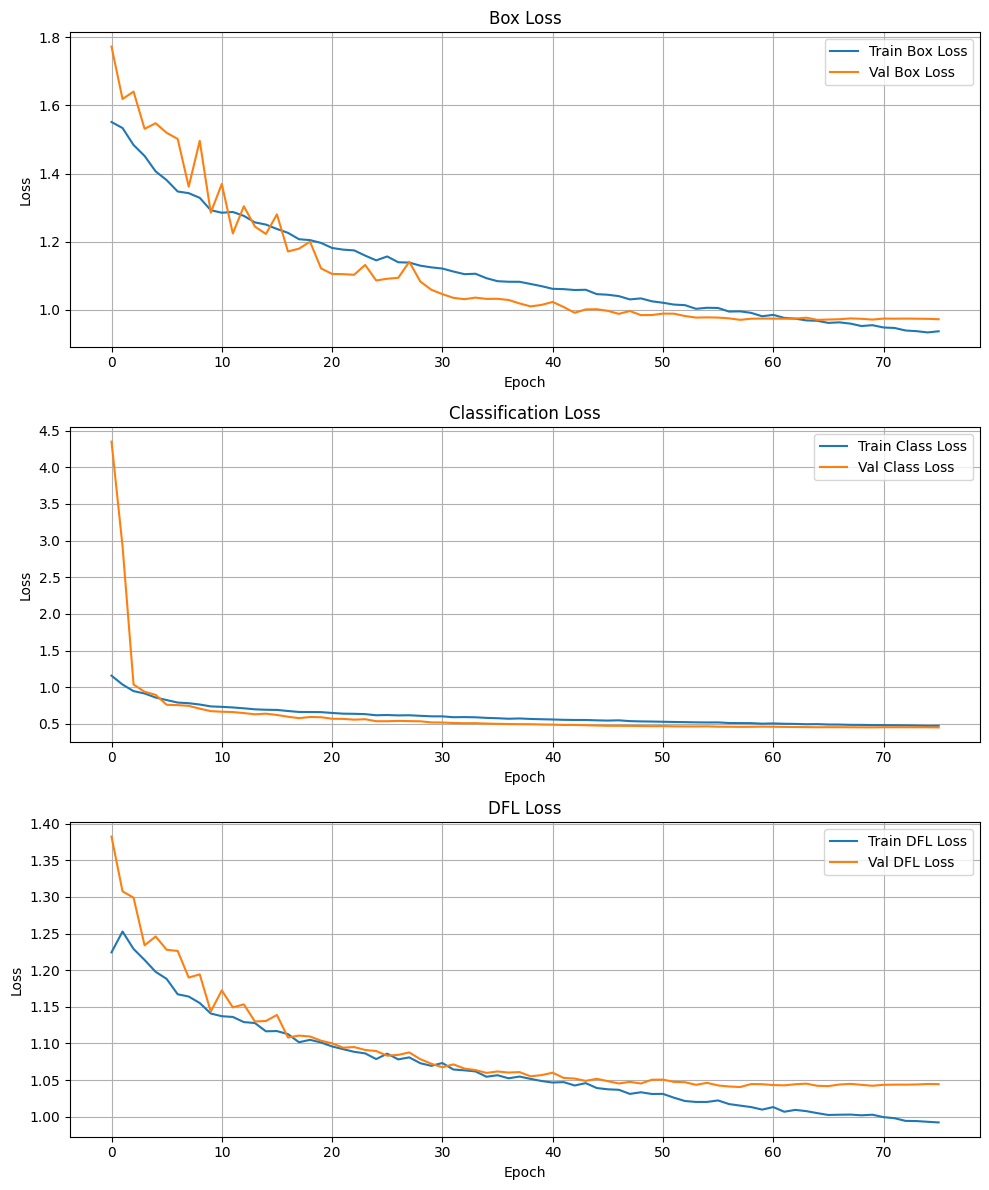

In [37]:
import matplotlib.pyplot as plt

# Sample data: replace with your actual loss lists
epochs = list(range(len(results['train/box_loss'])))
train_box = results['train/box_loss']
val_box = results['val/box_loss']
train_cls = results['train/cls_loss']
val_cls = results['val/cls_loss']
train_dfl = results['train/dfl_loss']
val_dfl = results['val/dfl_loss']

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Box Loss
axs[0].plot(epochs, train_box, label='Train Box Loss')
axs[0].plot(epochs, val_box, label='Val Box Loss')
axs[0].set_title('Box Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Class Loss
axs[1].plot(epochs, train_cls, label='Train Class Loss')
axs[1].plot(epochs, val_cls, label='Val Class Loss')
axs[1].set_title('Classification Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

# DFL Loss
axs[2].plot(epochs, train_dfl, label='Train DFL Loss')
axs[2].plot(epochs, val_dfl, label='Val DFL Loss')
axs[2].set_title('DFL Loss')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('Loss')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


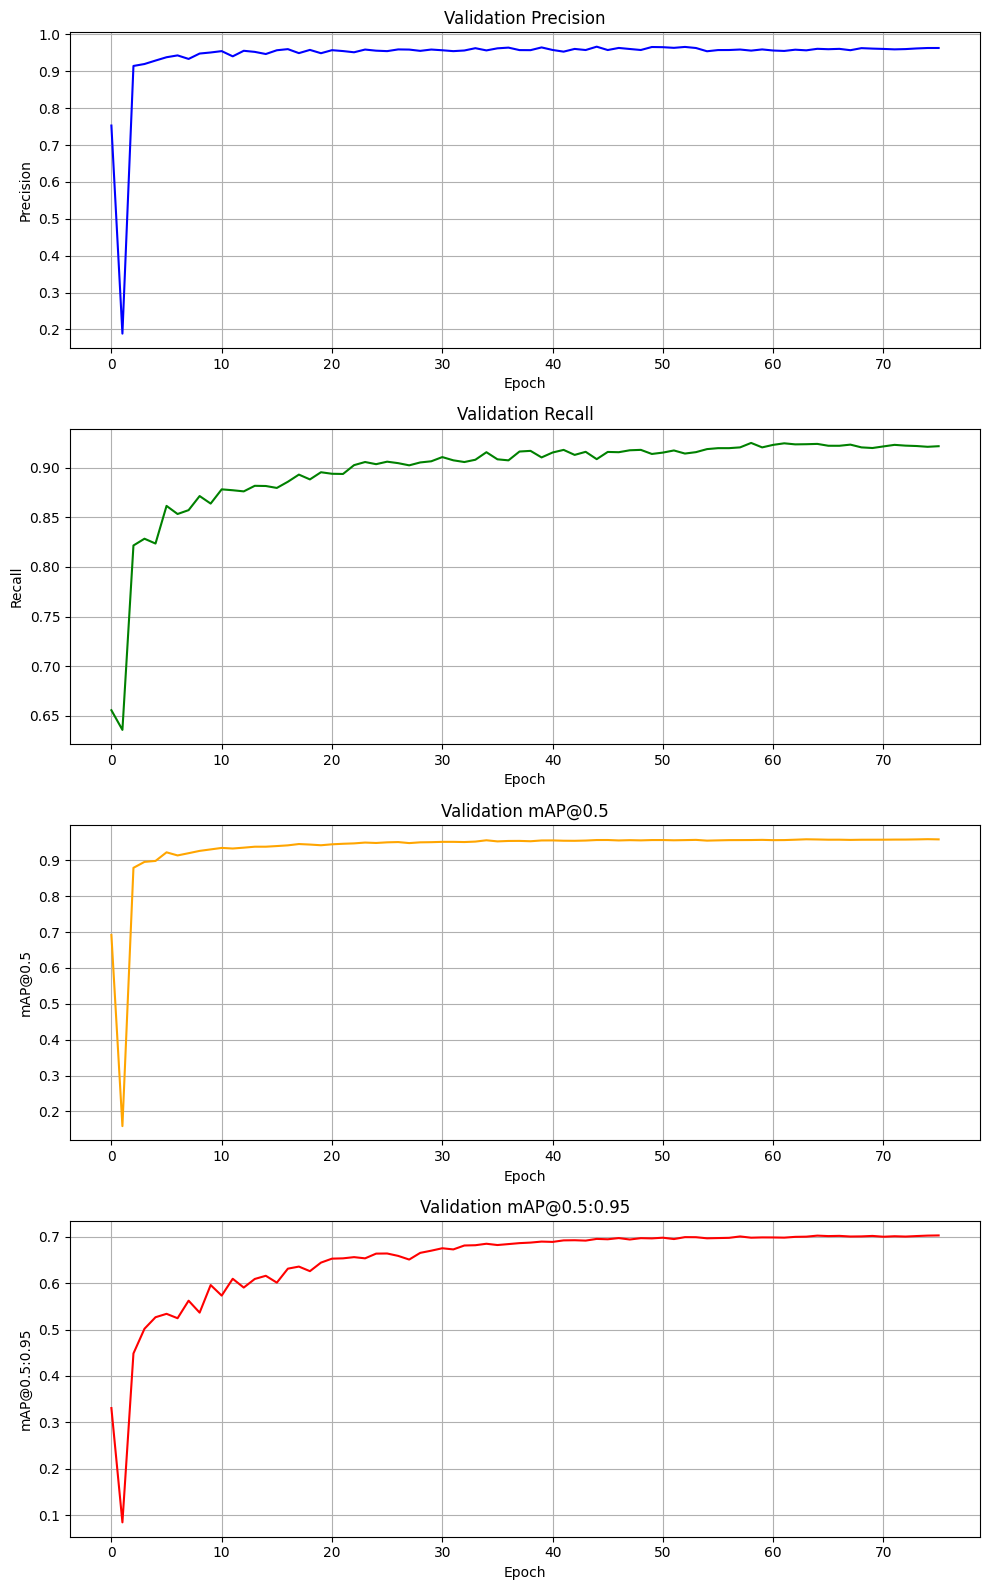

In [38]:
import matplotlib.pyplot as plt

# Example: replace with your actual metrics lists
epochs = list(range(len(results['metrics/precision(B)'])))
precision = results['metrics/precision(B)']
recall = results['metrics/recall(B)']
map50 = results['metrics/mAP50(B)']
map5095 = results['metrics/mAP50-95(B)']

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 16))

# Precision
axs[0].plot(epochs, precision, label='Precision', color='blue')
axs[0].set_title('Validation Precision')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Precision')
axs[0].grid(True)

# Recall
axs[1].plot(epochs, recall, label='Recall', color='green')
axs[1].set_title('Validation Recall')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Recall')
axs[1].grid(True)

# mAP@0.5
axs[2].plot(epochs, map50, label='mAP@0.5', color='orange')
axs[2].set_title('Validation mAP@0.5')
axs[2].set_xlabel('Epoch')
axs[2].set_ylabel('mAP@0.5')
axs[2].grid(True)

# mAP@0.5:0.95
axs[3].plot(epochs, map5095, label='mAP@0.5:0.95', color='red')
axs[3].set_title('Validation mAP@0.5:0.95')
axs[3].set_xlabel('Epoch')
axs[3].set_ylabel('mAP@0.5:0.95')
axs[3].grid(True)

plt.tight_layout()
plt.show()

#### Video to test
<video width="640" height="360" controls>
  <source src="./video.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>

In [29]:
import cv2
from ultralytics import YOLO

# Load your fine-tuned model
model = YOLO("/kaggle/working/player-detection-yolov8/run/weights/best.pt")

# Path to your input video
video_path = "/kaggle/input/football-player-detection-yolov8/video.mp4"

# Open the video file
cap = cv2.VideoCapture(video_path)

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Define the codec and create VideoWriter object
out = cv2.VideoWriter("/kaggle/working/player-detection-yolov8/output.mp4", cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # Run detection on the frame
    results = model.predict(frame, imgsz=640, classes=[1], conf=0.25)

    # Annotate the frame with bounding boxes
    annotated_frame = results[0].plot()

    # Write the annotated frame to the output video
    out.write(annotated_frame)

# Release resources
cap.release()
out.release()


[aac @ 0x9894eb80] Input buffer exhausted before END element found



0: 384x640 20 players, 51.2ms
Speed: 1.9ms preprocess, 51.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 18 players, 10.7ms
Speed: 1.6ms preprocess, 10.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 10.7ms
Speed: 1.5ms preprocess, 10.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 10.7ms
Speed: 1.5ms preprocess, 10.7ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 20 players, 10.7ms
Speed: 1.6ms preprocess, 10.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 19 players, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.8ms postprocess per image at

In [1]:
! ffmpeg -i ./predicted_output.mp4 -vcodec libx264 -acodec aac output_h264.mp4


ffmpeg version 6.1.1-3ubuntu5 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 13 (Ubuntu 13.2.0-23ubuntu3)
  configuration: --prefix=/usr --extra-version=3ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --disable-omx --enable-gnutls --enable-libaom --enable-libass --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libglslang --enable-libgme --enable-libgsm --enable-libharfbuzz --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzimg --ena

#### Results
<video width="640" height="360" controls>
  <source src="./output_h264.mp4" type="video/mp4">
  Your browser does not support the video tag.
</video>

In [ ]:
model.save('best_model.pt')